In [1]:
from pyopenms import *
import itertools
import numpy as np
import os
import matplotlib

from upsetplot import generate_counts
from upsetplot import from_memberships
from upsetplot import plot
import matplotlib.pyplot as plt

In [2]:

def load_peptides(file_in):
    '''
    Function to read in idXML file and output a list of peptides
    '''
    protein_ids = []
    peptide_ids = []
    IdXMLFile().load(file_in, 
                 protein_ids, 
                 peptide_ids)
    return(peptide_ids)

# peptide_file1 = load_peptides(file_in = "../data/one-sample/180412_0749_097_S01_Rep_2_GOS_927_0_1_single_FDR.idXML")
# peptide_file2 = load_peptides(file_in = "../data/one-sample/180412_0749_097_S02_Rep_1_GOS_927_0_8_single_FDR.idXML")

def retrieve_peptide_hits(peptide_id_file):
    '''
    Retrieves peptide list as a list of strings, from a loaded idXML file
    '''
    all_seq_hits = []

    for peptide_id in peptide_id_file:
    #     print(peptide_id.getMZ)
        for hit in peptide_id.getHits():
            seq_hit = hit.getSequence().toString()
            all_seq_hits.append(str(seq_hit))
    return(all_seq_hits)

# peptide_list_1 = retrieve_peptide_hits(peptide_file1)
# peptide_list_2 = retrieve_peptide_hits(peptide_file2)


def list_target_files(directory, target_string):
    '''
    Within a given directory, lists all files that contain a given target string
    '''
    files_in_target = os.listdir(directory)
    target_files = [file for file in files_in_target if target_string in file]
    return(target_files)

# blah = list_target_files(directory = '../data/one-sample', target_string = 'FDR')

def collect_all_peptides_dir(directory, target_string):
    
    '''
    Goes through a directory, loads each ms file, gets the peptide ids, returns a list 
    of unique peptide ids
    '''
    
    file_list = list_target_files(directory = directory,
                                 target_string = target_string)
    # define a list with all peptides
    all_peps = []
    for file_i in range(len(file_list)):
        print('Loading peptides from file:', file_list[file_i])
        loaded_peptides = load_peptides(file_in = directory + file_list[file_i])
        actual_peptides = retrieve_peptide_hits(peptide_id_file = loaded_peptides)
        all_peps.append(actual_peptides)
    # collapse list of lists of peptides into one, then find the unique ones (set), then make into a list
    all_unique_peps_from_dir = list(set([item for sublist in all_peps for item in sublist]))
    
    return(all_unique_peps_from_dir)

# peptides from all filter sizes
one_sample_peps = collect_all_peptides_dir(directory = '../data/one-sample/', 
                                          target_string = 'FDR')
pooled_peps = collect_all_peptides_dir(directory = '../data/pooled-database/', 
                                          target_string = 'FDR')
specific_peps = collect_all_peptides_dir(directory = '../data/specific-database/', 
                                          target_string = 'FDR')
metatrans_peps = collect_all_peptides_dir(directory = '../data/mzML-converted/mcmurdo-metatrans-searches/', 
                                          target_string = 'FDR.idXML')
metatrans_peps2 = collect_all_peptides_dir(directory = '../data/tfg-all-database/', 
                                          target_string = 'FDR.idXML')
tfg_t0_peps = collect_all_peptides_dir(directory = '../data/tfg-t0-database/', 
                                          target_string = 'FDR.idXML')

################# by filter size

one_sample_peps01 = collect_all_peptides_dir(directory = '../data/one-sample/', 
                                          target_string = '0_1_single_FDR')
pooled_peps01 = collect_all_peptides_dir(directory = '../data/pooled-database/', 
                                          target_string = '0_1_pooled_FDR')
specific_peps01 = collect_all_peptides_dir(directory = '../data/specific-database/', 
                                          target_string = '0_1_FDR')
# metatrans_peps01 = collect_all_peptides_dir(directory = '../data/mzML-converted/mcmurdo-metatrans-searches/', 
#                                           target_string = 'FDR.idXML')
metatrans_peps201 = collect_all_peptides_dir(directory = '../data/tfg-all-database/', 
                                          target_string = '0_1_tfg_all_FDR.idXML')
tfg_t0_peps01 = collect_all_peptides_dir(directory = '../data/tfg-t0-database/', 
                                          target_string = '0_1_tfg_t0_FDR.idXML')

one_sample_peps08 = collect_all_peptides_dir(directory = '../data/one-sample/', 
                                          target_string = '0_8_single_FDR')
pooled_peps08 = collect_all_peptides_dir(directory = '../data/pooled-database/', 
                                          target_string = '0_8_pooled_FDR')
specific_peps08 = collect_all_peptides_dir(directory = '../data/specific-database/', 
                                          target_string = '0_8_FDR')
# metatrans_peps08 = collect_all_peptides_dir(directory = '../data/mzML-converted/mcmurdo-metatrans-searches/', 
#                                           target_string = 'FDR.idXML')
metatrans_peps208 = collect_all_peptides_dir(directory = '../data/tfg-all-database/', 
                                          target_string = '0_8_tfg_all_FDR.idXML')
tfg_t0_peps08 = collect_all_peptides_dir(directory = '../data/tfg-t0-database/', 
                                          target_string = '0_8_tfg_t0_FDR.idXML')

one_sample_peps3 = collect_all_peptides_dir(directory = '../data/one-sample/', 
                                          target_string = '3_0_single_FDR')
pooled_peps3 = collect_all_peptides_dir(directory = '../data/pooled-database/', 
                                          target_string = '3_0_pooled_FDR')
specific_peps3 = collect_all_peptides_dir(directory = '../data/specific-database/', 
                                          target_string = '3_0_FDR')
# metatrans_peps3 = collect_all_peptides_dir(directory = '../data/mzML-converted/mcmurdo-metatrans-searches/', 
#                                           target_string = 'FDR.idXML')
metatrans_peps23 = collect_all_peptides_dir(directory = '../data/tfg-all-database/', 
                                          target_string = '3_0_tfg_all_FDR.idXML')
tfg_t0_peps3 = collect_all_peptides_dir(directory = '../data/tfg-t0-database/', 
                                          target_string = '3_0_tfg_t0_FDR.idXML')


Loading peptides from file: 180412_0749_097_S10_Rep_1_GOS_935_0_1_single_FDR.idXML
Loading peptides from file: 180412_0749_097_S01_Rep_1_GOS_927_0_1_single_FDR.idXML
Loading peptides from file: 180412_0749_097_S11_Rep_1_GOS_935_0_8_single_FDR.idXML
Loading peptides from file: 180412_0749_097_S03_Rep_3_GOS_927_3_0_single_FDR.idXML
Loading peptides from file: 180412_0749_097_S12_Rep_3_GOS_935_3_0_single_FDR.idXML
Loading peptides from file: 180412_0749_097_S08_Rep_2_GOS_933_0_8_single_FDR.idXML
Loading peptides from file: 180412_0749_097_S12_Rep_2_GOS_935_3_0_single_FDR.idXML
Loading peptides from file: 180412_0749_097_S03_Rep_2_GOS_927_3_0_single_FDR.idXML
Loading peptides from file: 180412_0749_097_S08_Rep_3_GOS_933_0_8_single_FDR.idXML
Loading peptides from file: 180412_0749_097_S07_Rep_2_GOS_933_0_1_single_FDR.idXML
Loading peptides from file: 180412_0749_097_S07_Rep_1_GOS_933_0_1_single_FDR.idXML
Loading peptides from file: 180412_0749_097_S03_Rep_1_GOS_927_3_0_single_FDR.idXML
Load

Loading peptides from file: 180412_0749_097_S03_Rep_2_FDR.idXML
Loading peptides from file: 180412_0749_097_S03_Rep_3_FDR.idXML
Loading peptides from file: 180412_0749_097_S02_Rep_1_FDR.idXML
Loading peptides from file: 180412_0749_097_S12_Rep_3_FDR.idXML
Loading peptides from file: 180412_0749_097_S12_Rep_2_FDR.idXML
Loading peptides from file: 180412_0749_097_S02_Rep_3_FDR.idXML
Loading peptides from file: 180412_0749_097_S12_Rep_1_FDR.idXML
Loading peptides from file: 180412_0749_097_S02_Rep_2_FDR.idXML
Loading peptides from file: 180412_0749_097_S04_Rep_1_FDR.idXML
Loading peptides from file: 180412_0749_097_S04_Rep_2_FDR.idXML
Loading peptides from file: 180412_0749_097_S05_Rep_1_FDR.idXML
Loading peptides from file: 180412_0749_097_S05_Rep_3_FDR.idXML
Loading peptides from file: 180412_0749_097_S05_Rep_2_FDR.idXML
Loading peptides from file: 180412_0749_097_S08_Rep_1_FDR.idXML
Loading peptides from file: 180412_0749_097_S06_Rep_3_FDR.idXML
Loading peptides from file: 180412_0749_

Loading peptides from file: 180412_0749_097_S04_Rep_2_GOS_930_0_1_FDR.idXML
Loading peptides from file: 180412_0749_097_S10_Rep_2_GOS_935_0_1_FDR.idXML
Loading peptides from file: 180412_0749_097_S07_Rep_2_GOS_933_0_1_FDR.idXML
Loading peptides from file: 180412_0749_097_S01_Rep_2_GOS_927_0_1_FDR.idXML
Loading peptides from file: 180412_0749_097_S01_Rep_1_GOS_927_0_1_FDR.idXML
Loading peptides from file: 180412_0749_097_S07_Rep_1_GOS_933_0_1_FDR.idXML
Loading peptides from file: 180412_0749_097_S04_Rep_1_GOS_930_0_1_FDR.idXML
Loading peptides from file: 180412_0749_097_S10_Rep_1_GOS_935_0_1_FDR.idXML
Loading peptides from file: 180412_0749_097_S07_Rep_1_GOS_933_0_1_tfg_all_FDR.idXML
Loading peptides from file: 180412_0749_097_S04_Rep_1_GOS_930_0_1_tfg_all_FDR.idXML
Loading peptides from file: 180412_0749_097_S01_Rep_1_GOS_927_0_1_tfg_all_FDR.idXML
Loading peptides from file: 180412_0749_097_S10_Rep_2_GOS_935_0_1_tfg_all_FDR.idXML
Loading peptides from file: 180412_0749_097_S04_Rep_2_GO

Loading peptides from file: 180412_0749_097_S03_Rep_1_GOS_927_3_0_pooled_FDR.idXML
Loading peptides from file: 180412_0749_097_S06_Rep_1_GOS_930_3_0_pooled_FDR.idXML
Loading peptides from file: 180412_0749_097_S09_Rep_3_GOS_933_3_0_pooled_FDR.idXML
Loading peptides from file: 180412_0749_097_S09_Rep_2_GOS_933_3_0_pooled_FDR.idXML
Loading peptides from file: 180412_0749_097_S09_Rep_1_GOS_933_3_0_pooled_FDR.idXML
Loading peptides from file: 180412_0749_097_S06_Rep_3_GOS_930_3_0_pooled_FDR.idXML
Loading peptides from file: 180412_0749_097_S06_Rep_2_GOS_930_3_0_pooled_FDR.idXML
Loading peptides from file: 180412_0749_097_S12_Rep_1_GOS_935_3_0_FDR.idXML
Loading peptides from file: 180412_0749_097_S06_Rep_1_GOS_930_3_0_FDR.idXML
Loading peptides from file: 180412_0749_097_S09_Rep_1_GOS_933_3_0_FDR.idXML
Loading peptides from file: 180412_0749_097_S03_Rep_1_GOS_927_3_0_FDR.idXML
Loading peptides from file: 180412_0749_097_S12_Rep_3_GOS_935_3_0_FDR.idXML
Loading peptides from file: 180412_0749

In [4]:
## load digested databases for a database comparison


def get_digested_peps(filename_i):
    '''
    gets the digested peptide files and 
    reads them into a list
    '''
    text_file = open(filename_i, 
                     newline= '\n')

    all_lines = []
    with text_file as f:
        line = f.readlines()
        all_lines.append(line)

    text_file.close()
    return all_lines

def get_all_digested_peps(filename_folder, target_string):
    '''
    loops through all the txt files with digested databases in the
    folder
    '''
    # getting the list of file names
    list_of_txt_files = list_target_files(filename_folder, 
                                          target_string = target_string)
    
    print(list_of_txt_files)
    # reading in each file
    all_peptide_lists = []
    for i in list_of_txt_files:
        digested_pep_list = get_digested_peps('../data/digested-databases/' + i)
        all_peptide_lists.append((list(set(digested_pep_list[0]))))
        
    return [list_of_txt_files, all_peptide_lists]
    
    

In [6]:
list_of_peps_all = get_all_digested_peps(filename_folder='../data/digested-databases/', target_string = 'txt')

list_dig_peps_01 = [list_of_peps_all[1][6], 
                    list_of_peps_all[1][11], 
                    list_of_peps_all[1][4], 
                    list_of_peps_all[1][2], 
                    list_of_peps_all[1][3],
                    list_of_peps_all[1][7]]

list_dig_peps_01_names = [list_of_peps_all[0][6], 
                    list_of_peps_all[0][11], 
                    list_of_peps_all[0][4], 
                    list_of_peps_all[0][2], 
                    list_of_peps_all[0][3],
                    list_of_peps_all[0][7]]

list_dig_peps_08 = [list_of_peps_all[1][5], 
                    list_of_peps_all[1][13], 
                    list_of_peps_all[1][8], 
                    list_of_peps_all[1][1], 
                    list_of_peps_all[1][3],
                    list_of_peps_all[1][7]]

list_dig_peps_08_names = [list_of_peps_all[0][5], 
                    list_of_peps_all[0][13], 
                    list_of_peps_all[0][8], 
                    list_of_peps_all[0][1], 
                    list_of_peps_all[0][3],
                    list_of_peps_all[0][7]]

list_dig_peps_30 = [list_of_peps_all[1][10], 
                    list_of_peps_all[1][9], 
                    list_of_peps_all[1][12], 
                    list_of_peps_all[1][0], 
                    list_of_peps_all[1][3],
                    list_of_peps_all[1][7]]

list_dig_peps_30_names = [list_of_peps_all[0][10], 
                    list_of_peps_all[0][9], 
                    list_of_peps_all[0][12], 
                    list_of_peps_all[0][0], 
                    list_of_peps_all[0][3],
                    list_of_peps_all[0][7]]



['GOS_935_3_0_nonredun_single.txt', 'GOS_935_0_8_nonredun_single.txt', 'GOS_935_0_1_nonredun_single.txt', 'tfg_t0_nonredun_single.txt', 'GOS_933_0_1_nonredun_single.txt', 'GOS_927_0_8_nonredun_single.txt', 'GOS_927_0_1_nonredun_single.txt', 'tfg_assembly.orf_nonredun_single.txt', 'GOS_933_0_8_nonredun_single.txt', 'GOS_930_3_0_nonredun_single.txt', 'GOS_927_3_0_nonredun_single.txt', 'GOS_930_0_1_nonredun_single.txt', 'GOS_933_3_0_nonredun_single.txt', 'GOS_930_0_8_nonredun_single.txt']


In [ ]:
['Week 1: Metatranscriptome and metagenome (3.0um)',
                                                               'Week 2: Metatranscriptome and metagenome (3.0um)',
                                                               'Week 3: Metatranscriptome and metagenome (3.0um)',
                                                               'Week 4: Metatranscriptome and metagenome (3.0um)',
                                                               'Metatranscriptome Experiment: All samples',
                                                               'Metatranscriptome Experiment: T=0 Only']

In [7]:
print(list_dig_peps_30_names)
print(list_dig_peps_08_names)
print(list_dig_peps_01_names)
# list_of_peps_all[0]

['GOS_927_3_0_nonredun_single.txt', 'GOS_930_3_0_nonredun_single.txt', 'GOS_933_3_0_nonredun_single.txt', 'GOS_935_3_0_nonredun_single.txt', 'tfg_t0_nonredun_single.txt', 'tfg_assembly.orf_nonredun_single.txt']
['GOS_927_0_8_nonredun_single.txt', 'GOS_930_0_8_nonredun_single.txt', 'GOS_933_0_8_nonredun_single.txt', 'GOS_935_0_8_nonredun_single.txt', 'tfg_t0_nonredun_single.txt', 'tfg_assembly.orf_nonredun_single.txt']
['GOS_927_0_1_nonredun_single.txt', 'GOS_930_0_1_nonredun_single.txt', 'GOS_933_0_1_nonredun_single.txt', 'GOS_935_0_1_nonredun_single.txt', 'tfg_t0_nonredun_single.txt', 'tfg_assembly.orf_nonredun_single.txt']


In [8]:


# a = ['1','3','2','6']
# b = ['5','3','1','7']
# c = ['1','4','2','6']
# d = ['1', '2', '3', '4']
# e = ['1', '2', '3', '4']

# L = [a, b, c, d, e]

L = [one_sample_peps, pooled_peps, specific_peps, metatrans_peps2, tfg_t0_peps]
L_names = ['One Sample Database', 'Pooled by Size Fraction \nDatabases', 
           'Sample-Specific Databases', 'Metatranscriptomic Experiment\n (TFG) Database',
          'Metatranscriptomic Experiment\n T0 Database']

# making filter size-specific lists of peptides
# 0.1um
L01 = [one_sample_peps01, pooled_peps01, specific_peps01, metatrans_peps201, tfg_t0_peps01]
# 0.8um
L08 = [one_sample_peps08, pooled_peps08, specific_peps08, metatrans_peps208, tfg_t0_peps08]
# 3.0um
L3 = [one_sample_peps3, pooled_peps3, specific_peps3, metatrans_peps23, tfg_t0_peps3]


def find_all_subsets(L):
    list_subsets = []
    for length in range(1, len(L)):
        for subset in itertools.combinations(range(0,len(L)), length):
            list_subsets.append(subset)
    return(list_subsets)


def create_list_of_set_idxs(L, subsets_idx):
    '''
    returns a list of indexes corresponding to elements to not intersect list
    '''
    IDS = [x for x in range(len(L))]
    set_list = []
    for i in subsets_idx:
        ids = list(IDS)
        set_list.append(list(np.setdiff1d(ids, i)))
    return(set_list)

def intersect(*L):
    '''
    Given a list of lists, returns the elements present in all lists
    '''
    result = set(L[0]).intersection(*L)
    return result

def make_inter_list(L, subsets_idx):
    master_inter = []
    for idx in range(len(subsets_idx)):
        temp_list = []
        for element in subsets_idx[idx]: 
            temp_list.append(L[element])
        inter_list = intersect(*temp_list)
        master_inter.append(inter_list)
    return master_inter
    

def make_set_list(L, set_list):
    master_set = []
    for idx in range(len(set_list)):
        temp_list = []
        for element in set_list[idx]:
            temp_list.append(L[element])
        set_list_out = set([x for list_i in temp_list for x in list_i])
        master_set.append(set_list_out)
    return master_set


def make_overlapper_top(master_inter, master_set):
    
    finale = []
    for element_i in range(len(master_inter)):
        inter_i = master_inter[element_i] 
        set_i = master_set[element_i]
        unique_i = [x for x in inter_i if x not in set_i]
        finale.append(len(unique_i))
    return(finale)

def append_all_overlapping(L, overlapper_top):
    
    all_unique_vals = set([x for list_i in L for x in list_i])
    all_except_end = sum(overlapper_top)
    real_finale = len(all_unique_vals) - all_except_end
    real_finale_boom = overlapper_top + [real_finale]
    
    return(real_finale_boom)
    
def overlapper(L):
    subsets_idx = find_all_subsets(L)    
    set_list = create_list_of_set_idxs(L, subsets_idx)
    master_inter = make_inter_list(subsets_idx = subsets_idx, L = L)
    master_set =  make_set_list(set_list = set_list, L = L)
    overlapper_top = make_overlapper_top(master_inter, master_set)
    output = append_all_overlapping(L, overlapper_top)
    return(output)

def get_overlapper_names(L_names):
    name_indexes = find_all_subsets(L_names)
    name_list = []

    for name_index_i in range(len(name_indexes)):
#         print(name_indexes[name_index_i])
        temp_name_list = []
        for name_i in name_indexes[name_index_i]:
#             print(L_names[name_i])

            temp_name_list.append(L_names[name_i])
        name_list.append(temp_name_list)
    name_list.append(L_names)
    
    return(name_list)


In [17]:
overlapping_digested_database_names_01 = get_overlapper_names(['Week 1: Metatranscriptome and metagenome (0.1um)',
                                                               'Week 2: Metatranscriptome and metagenome (0.1um)',
                                                               'Week 3: Metatranscriptome and metagenome (0.1um)',
                                                               'Week 4: Metatranscriptome and metagenome (0.1um)',
                                                               'Metatranscriptome Experiment: T=0 Only',
                                                               'Metatranscriptome Experiment: All samples'])
overlapping_digested_database_names_08 = get_overlapper_names(['Week 1: Metatranscriptome and metagenome (0.8um)',
                                                               'Week 2: Metatranscriptome and metagenome (0.8um)',
                                                               'Week 3: Metatranscriptome and metagenome (0.8um)',
                                                               'Week 4: Metatranscriptome and metagenome (0.8um)',
                                                               'Metatranscriptome Experiment: T=0 Only',
                                                               'Metatranscriptome Experiment: All samples'])
overlapping_digested_database_names_30 = get_overlapper_names(['Week 1: Metatranscriptome and metagenome (3.0um)',
                                                               'Week 2: Metatranscriptome and metagenome (3.0um)',
                                                               'Week 3: Metatranscriptome and metagenome (3.0um)',
                                                               'Week 4: Metatranscriptome and metagenome (3.0um)',
                                                               'Metatranscriptome Experiment: T=0 Only',
                                                               'Metatranscriptome Experiment: All samples'])

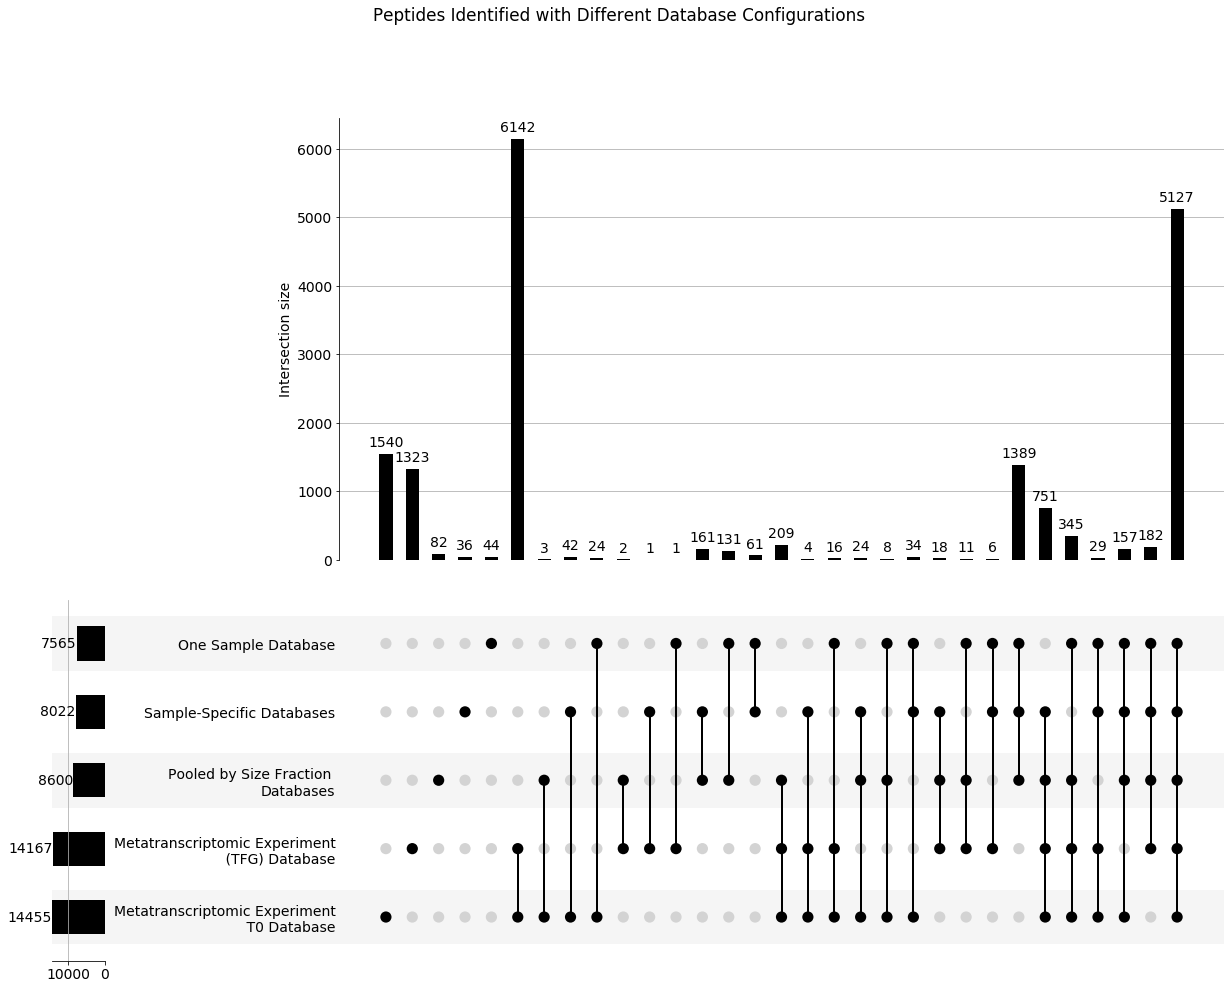

In [18]:
# get the overlapping number of peptides
overlapping_peptides = overlapper(L)

# get the overlapping number of peptides for filter sizes
overlapping_peptides01 = overlapper(L01)
overlapping_peptides08 = overlapper(L08)
overlapping_peptides30 = overlapper(L3)

# get the overlapping number of peptides for digested datbases
overlapping_digested_peptides_01 = overlapper(list_dig_peps_01)
overlapping_digested_peptides_08 = overlapper(list_dig_peps_08)
overlapping_digested_peptides_30 = overlapper(list_dig_peps_30)

# write the different names for upsetplot
overlapping_database_names = get_overlapper_names(L_names)

# add them together
database_overlap_plot = from_memberships(overlapping_database_names, 
                           data = overlapping_peptides)

## filter size specific databases
database_overlap_plot01 = from_memberships(overlapping_database_names, 
                           data = overlapping_peptides01)
database_overlap_plot08 = from_memberships(overlapping_database_names, 
                           data = overlapping_peptides08)
database_overlap_plot3 = from_memberships(overlapping_database_names, 
                           data = overlapping_peptides30)

## datbase overlap of digested peptides
database_overlap_digested_01 = from_memberships(overlapping_digested_database_names_01,
                                        data = overlapping_digested_peptides_01)
database_overlap_digested_08 = from_memberships(overlapping_digested_database_names_08,
                                        data = overlapping_digested_peptides_08)
database_overlap_digested_30 = from_memberships(overlapping_digested_database_names_30,
                                        data = overlapping_digested_peptides_30)

# making the figure
plot(database_overlap_plot, show_counts = '%d')
current_figure = matplotlib.pyplot.gcf()

current_figure.set_size_inches(21, 15.5)
plt.rcParams.update({'font.size': 14})
plt.suptitle('Peptides Identified with Different Database Configurations')
current_figure.savefig("../figures/peptides-from-different-databases.png")

In [24]:
# L = [one_sample_peps, pooled_peps, specific_peps, metatrans_peps2, tfg_t0_peps]
# L_names = ['One Sample Database', 'Pooled by Size Fraction \nDatabases', 
#            'Sample-Specific Databases', 'Metatranscriptomic Experiment\n (TFG) Database',
#           'Metatranscriptomic Experiment\n T0 Database']

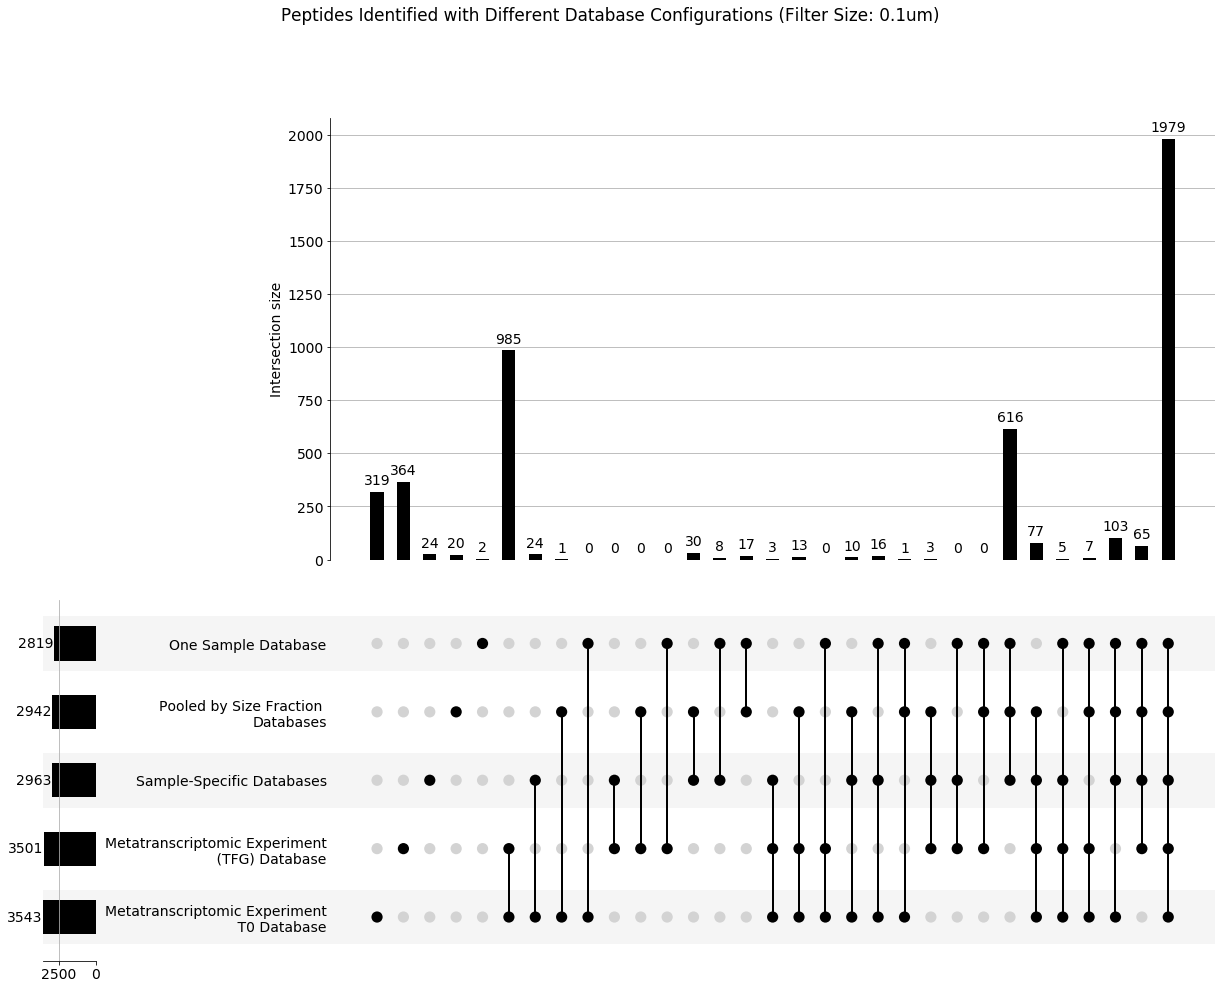

In [19]:
# making the figure
plot(database_overlap_plot01, show_counts = '%d')
current_figure = matplotlib.pyplot.gcf()

current_figure.set_size_inches(21, 15.5)
plt.rcParams.update({'font.size': 14})
plt.suptitle('Peptides Identified with Different Database Configurations (Filter Size: 0.1um)')
current_figure.savefig("../figures/peptides-from-different-databases01.png")

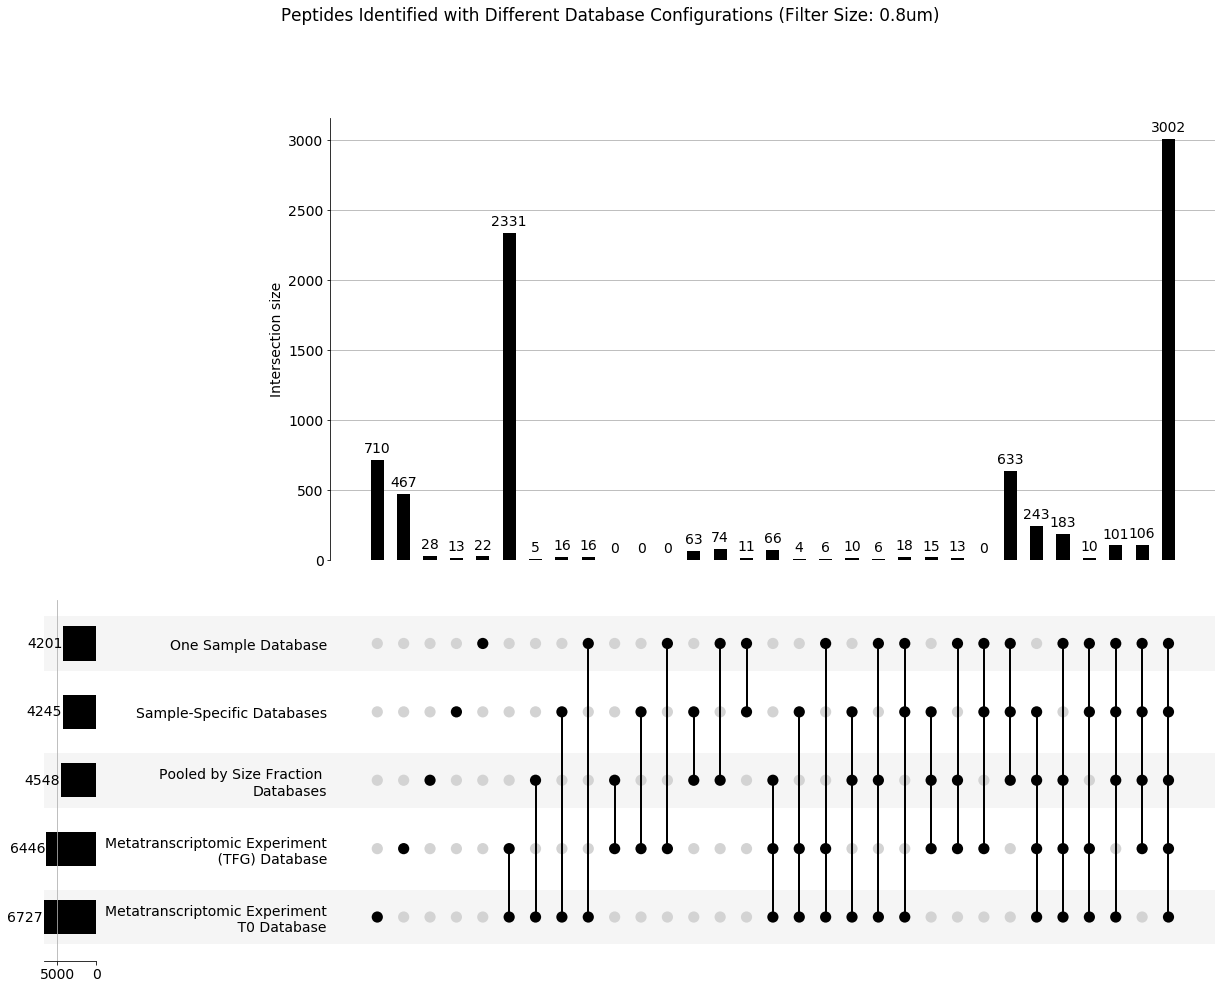

In [20]:
# making the figure
plot(database_overlap_plot08, show_counts = '%d')
current_figure = matplotlib.pyplot.gcf()

current_figure.set_size_inches(21, 15.5)
plt.rcParams.update({'font.size': 14})
plt.suptitle('Peptides Identified with Different Database Configurations (Filter Size: 0.8um)')
current_figure.savefig("../figures/peptides-from-different-databases08.png")

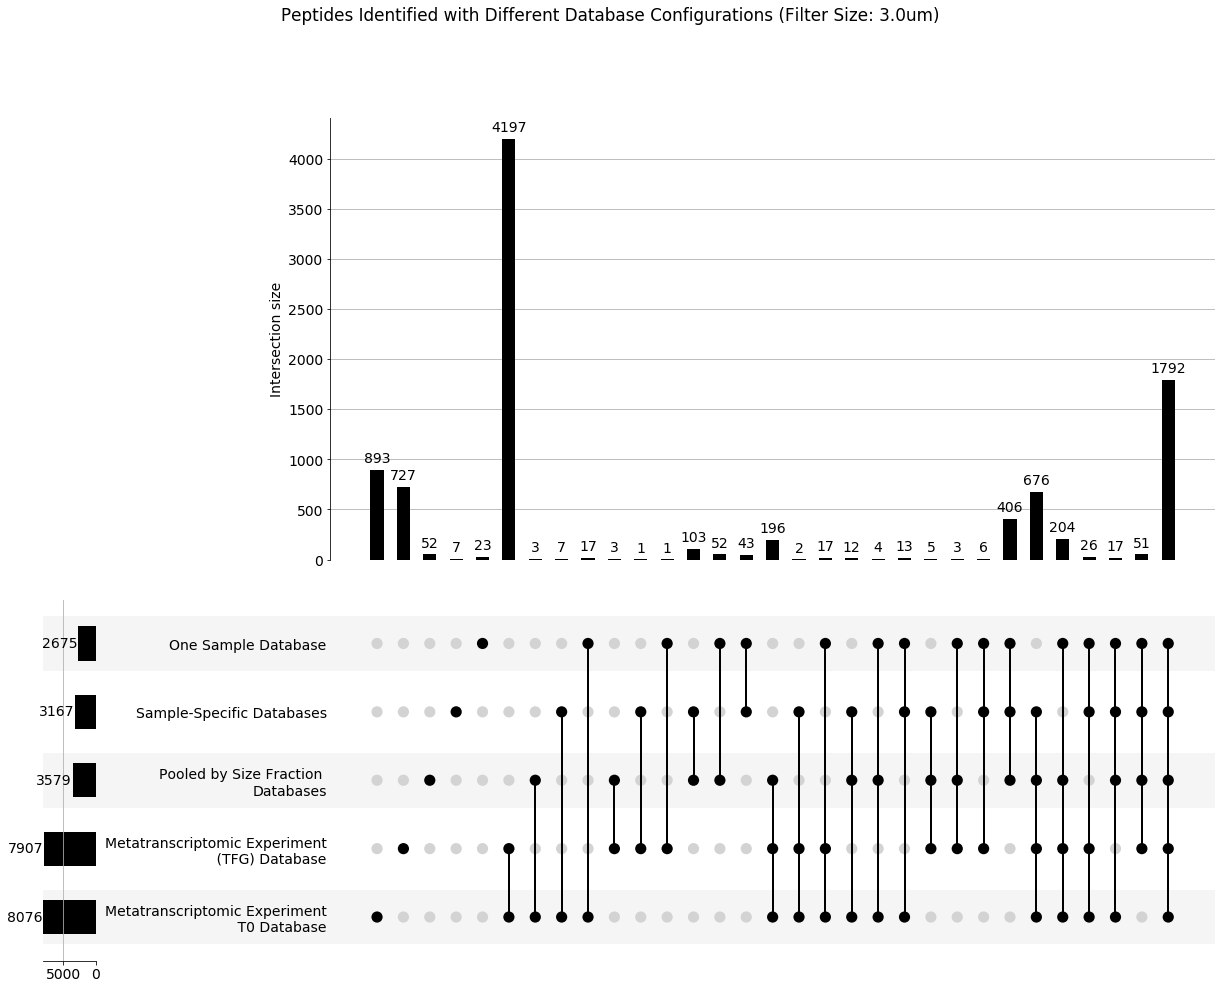

In [21]:
# making the figure
plot(database_overlap_plot3, show_counts = '%d')
current_figure = matplotlib.pyplot.gcf()

current_figure.set_size_inches(21, 15.5)
plt.rcParams.update({'font.size': 14})
plt.suptitle('Peptides Identified with Different Database Configurations (Filter Size: 3.0um)')
current_figure.savefig("../figures/peptides-from-different-databases30.png")

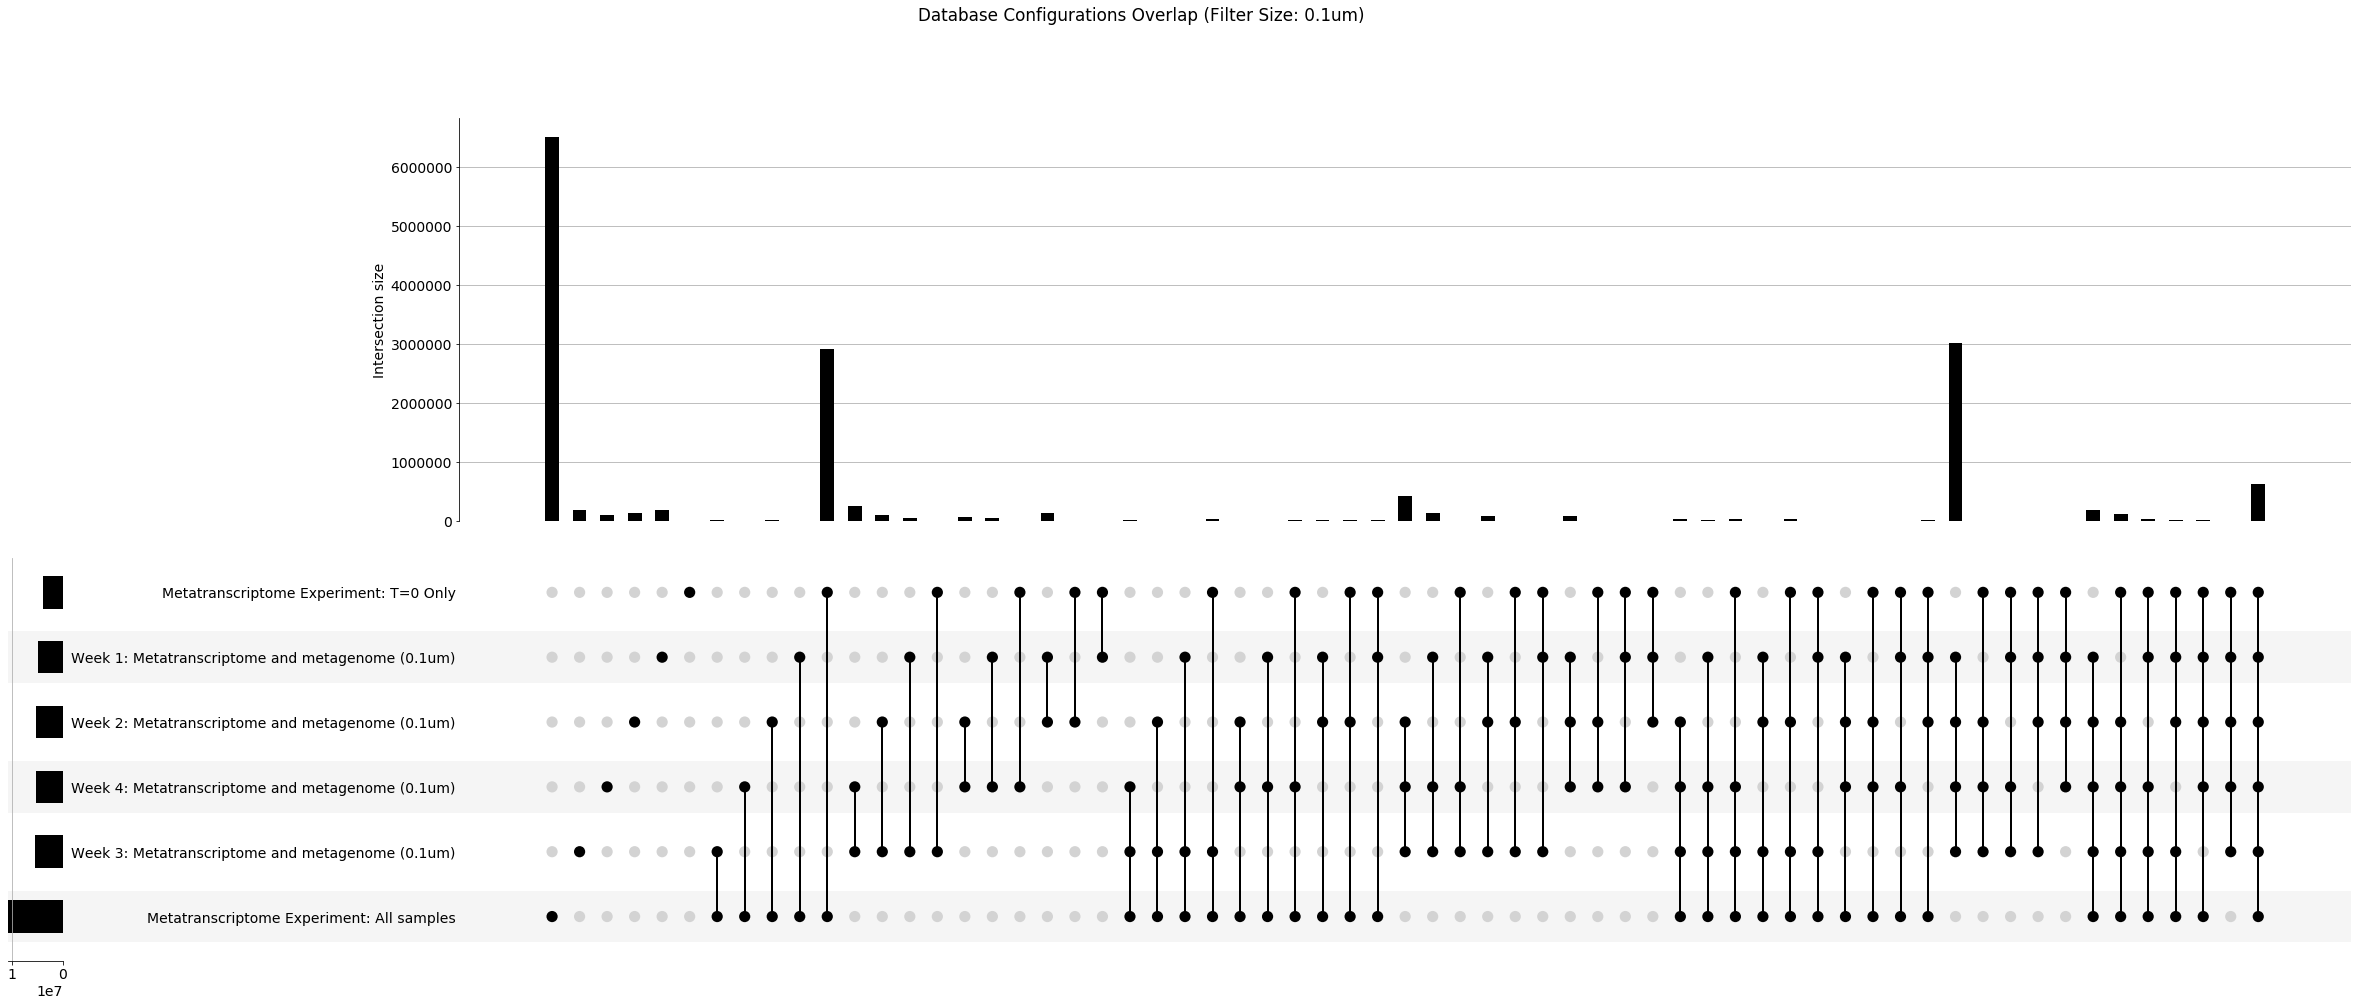

In [22]:
# making the figure
plot(database_overlap_digested_01)
current_figure = matplotlib.pyplot.gcf()

current_figure.set_size_inches(42, 15.5)
plt.rcParams.update({'font.size': 14})
plt.suptitle('Database Configurations Overlap (Filter Size: 0.1um)')
current_figure.savefig("../figures/database_overlap_digested_01.png")

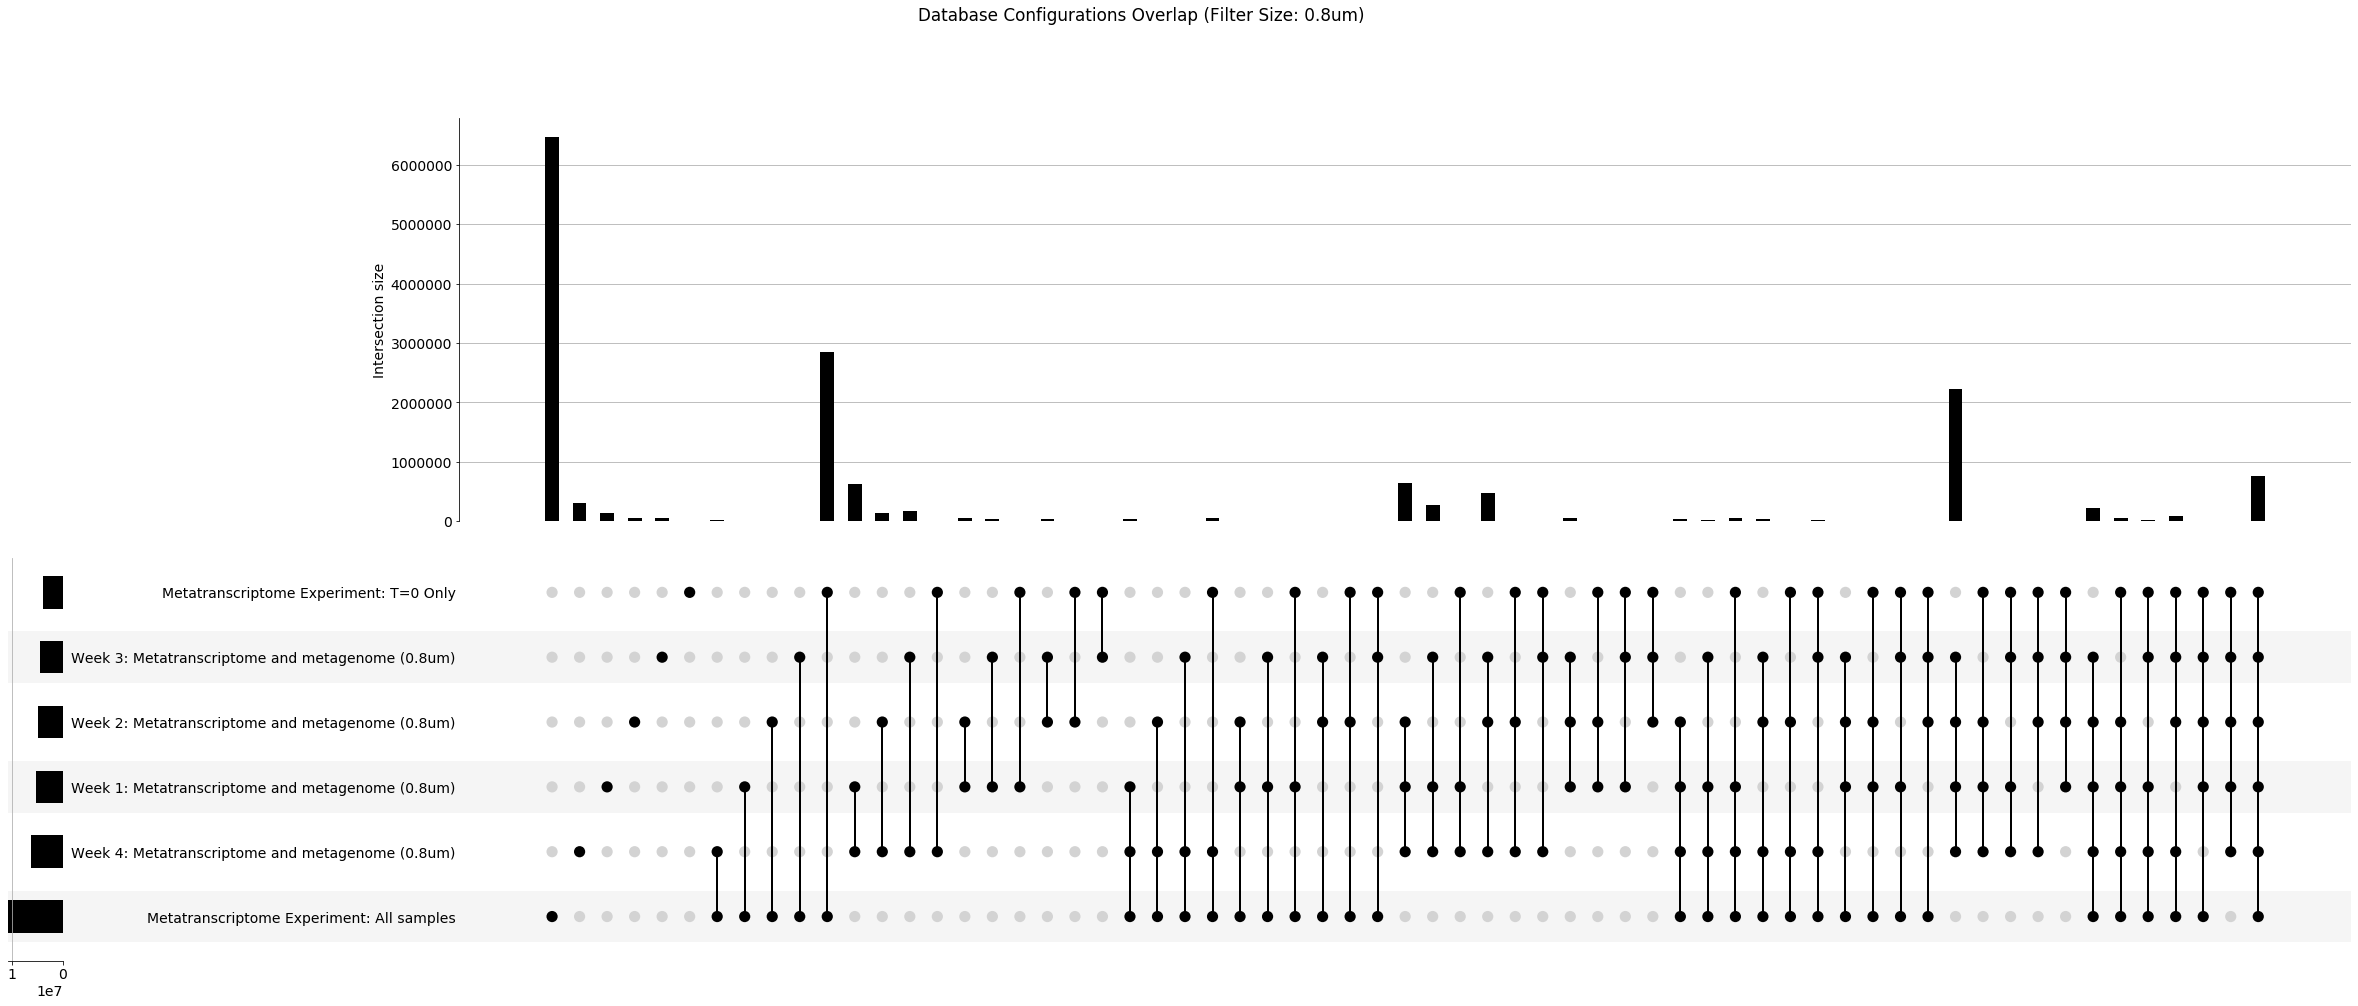

In [23]:
# making the figure
plot(database_overlap_digested_08)
current_figure = matplotlib.pyplot.gcf()

current_figure.set_size_inches(42, 15.5)
plt.rcParams.update({'font.size': 14})
plt.suptitle('Database Configurations Overlap (Filter Size: 0.8um)')
current_figure.savefig("../figures/database_overlap_digested_08.png")

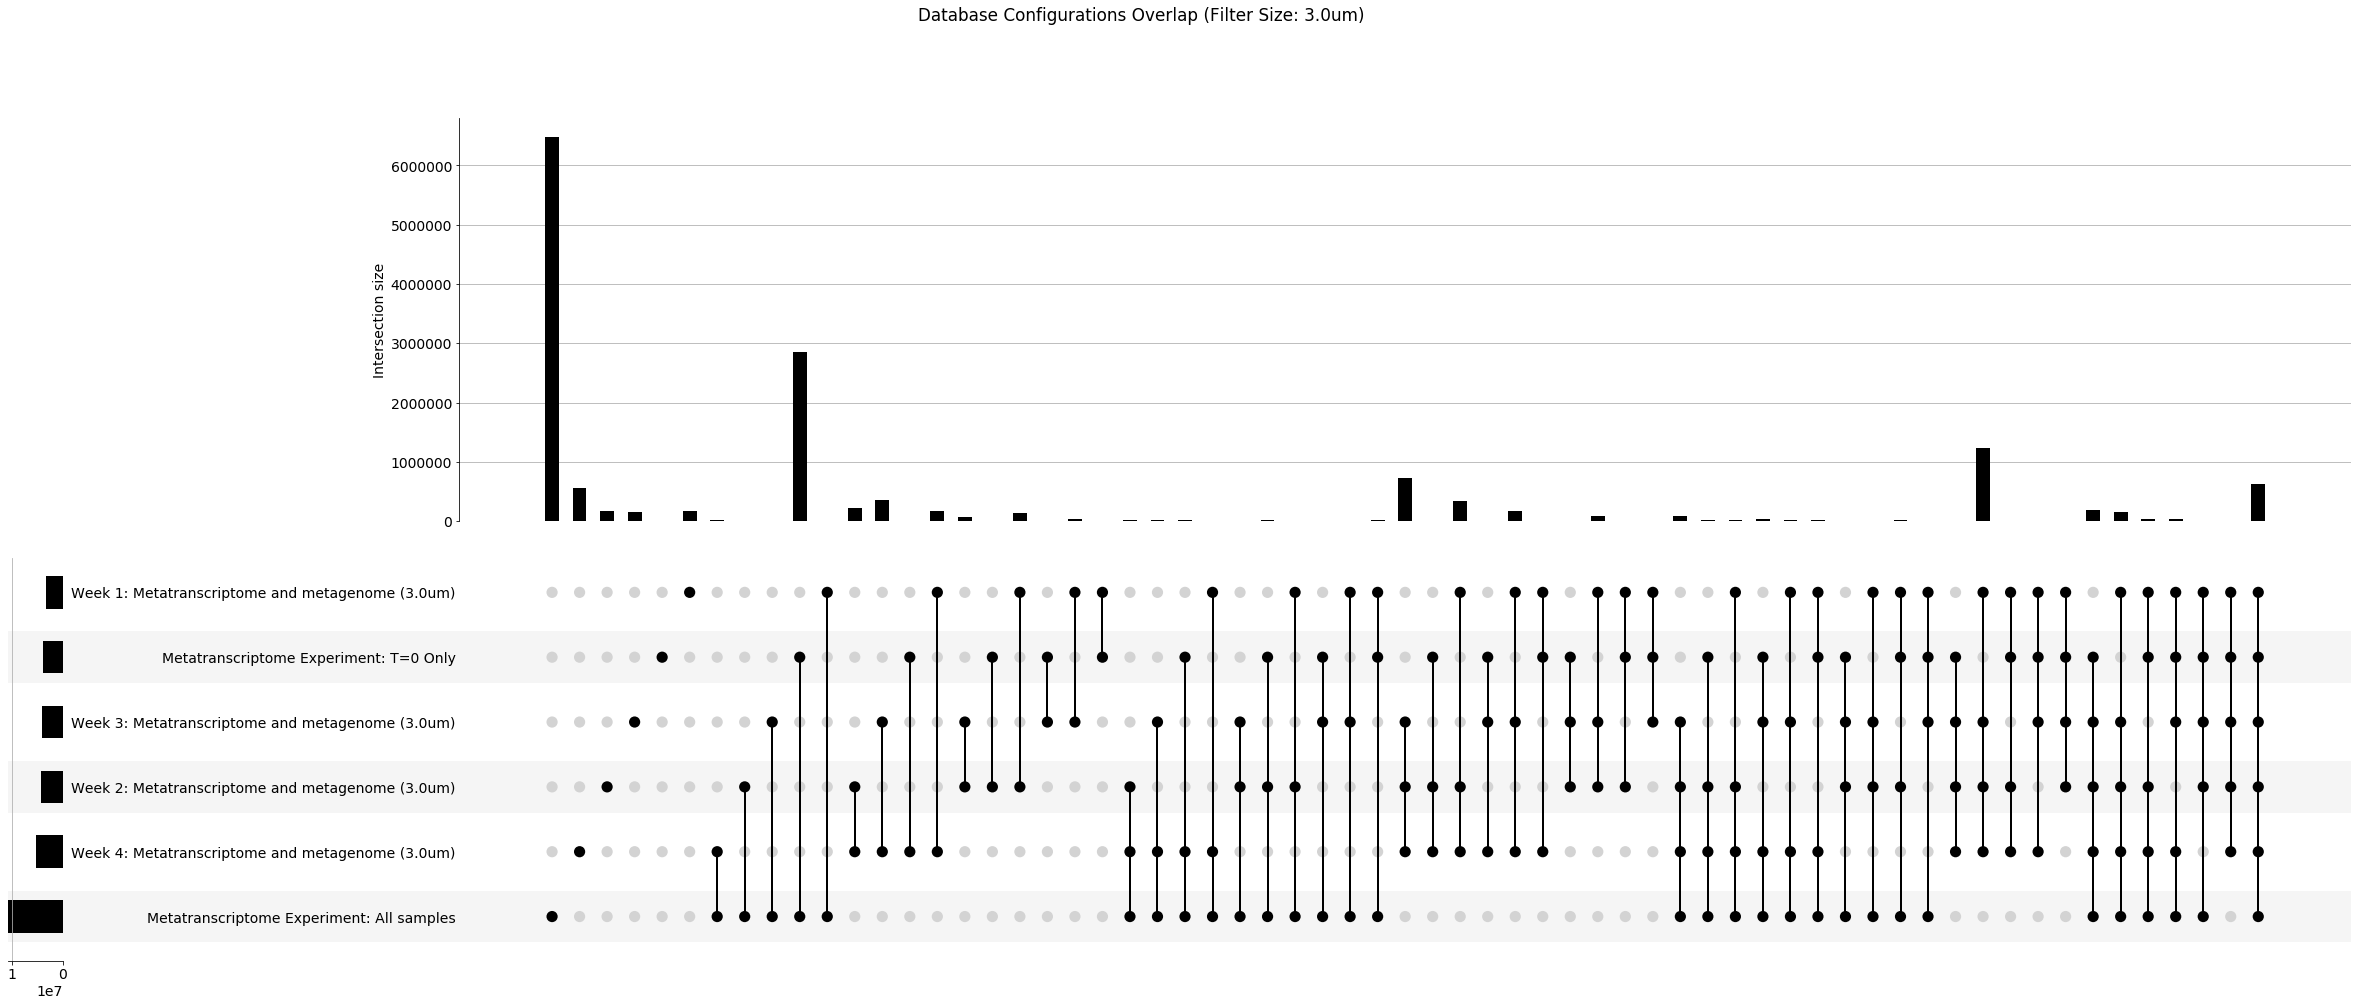

In [24]:
# making the figure
plot(database_overlap_digested_30)
current_figure = matplotlib.pyplot.gcf()

current_figure.set_size_inches(42, 15.5)
plt.rcParams.update({'font.size': 14})
plt.suptitle('Database Configurations Overlap (Filter Size: 3.0um)')
current_figure.savefig("../figures/database_overlap_digested_30.png")